## Homework Assignment - Session 3

#### Exercise 3 (p.198, Chap.5)

 We now review k-fold cross-validation.
(a) Explain how k-fold cross-validation is implemented.
(b) What are the advantages and disadvantages of k-fold crossvalidation relative to:
i. The validation set approach?
ii. LOOCV?

K fold cross validation is randomly divides the dataset into k number of equivalent groups. The first fold is kept for testing and the model is trained on k-1 folds

#### Advantages:
* Reduced bias
* The variance of the resulting estimate is reduced as k increases
* Comparatively easy to implement
* Simple

#### Disadvantages:
* The training algorithm is computationally intensive
* the validation set error rate may tend to overestimate the test error rate

#### Exercise 8 (p.200, Chap.5)

a. what is n and what is p? Write out the model
used to generate the data in equation form.

In [2]:
set.seed(200)
y = rnorm(100)
x = rnorm(100)
y = x - 2 * x^2 + rnorm(100)

b. Create a scatterplot of X against Y . Comment on what you find.

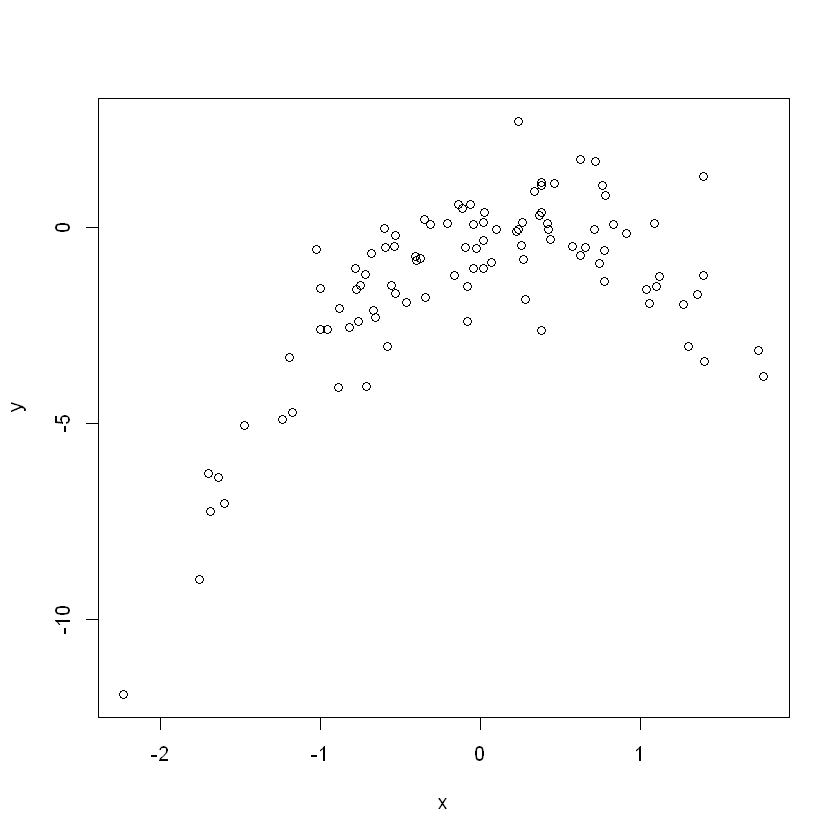

In [3]:
plot(x, y)

c.  Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares.
i. Y = β0 + β1X +
ii. Y = β0 + β1X + β2X2 +
iii. Y = β0 + β1X + β2X2 + β3X3 +
iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + 

Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y

In [8]:
install.packages("boot")
library(boot)
Data = data.frame(x, y)
set.seed(10)

glm.fit = glm(y ~ x)
cv.glm(Data, glm.fit)$delta

Installing package into 'C:/Users/dwijayaweera/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'boot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dwijayaweera\AppData\Local\Temp\RtmpekL8CQ\downloaded_packages


Warning message:
"package 'boot' was built under R version 3.6.2"

[1] 3.815418 3.813922

In [9]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

[1] 1.101288 1.100959

In [10]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

[1] 1.109609 1.109208

In [11]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 1.132655 1.132034

(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

In [12]:
set.seed(200)

glm.fit = glm(y ~ x)
cv.glm(Data, glm.fit)$delta

[1] 3.815418 3.813922

In [13]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

[1] 1.101288 1.100959

In [14]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

[1] 1.109609 1.109208

In [15]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 1.132655 1.132034

In [ ]:
It was the same. Yes, because it is the same data set except for the seed.

(e) Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.

glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

(f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?

In [16]:
summary(glm.fit)

#p-values show statistical significance


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.64365  -0.64356   0.00863   0.60774   3.10084  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4110     0.1039 -13.582   <2e-16 ***
poly(x, 4)1  12.5920     1.0388  12.121   <2e-16 ***
poly(x, 4)2 -15.7694     1.0388 -15.180   <2e-16 ***
poly(x, 4)3   0.7248     1.0388   0.698    0.487    
poly(x, 4)4  -0.8165     1.0388  -0.786    0.434    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.079189)

    Null deviance: 510.95  on 99  degrees of freedom
Residual deviance: 102.52  on 95  degrees of freedom
AIC: 298.28

Number of Fisher Scoring iterations: 2


#### Exercise 1 (p.259, Chap.6)

We perform best subset, forward stepwise, and backward stepwise
selection on a single data set. For each approach, we obtain p + 1
models, containing 0, 1, 2,...,p predictors. Explain your answers:

(a) Which of the three models with k predictors has the smallest
training RSS?

Best subset

b. Which of the three models with k predictors has the smallest
test RSS?

Best subset selection can have the lowest RSS compared to other two

(c) True or False:

True
    

True

False

False

True

#### Exercise 9 (p.263, Chap.6)

 In this exercise, we will predict the number of applications received
using the other variables in the College data set.
(a) Split the data set into a training set and a test set

In [17]:
library(ISLR)

train.size = dim(College)[1] / 2
train = sample(1:dim(College)[1], train.size)
test = -train
College.train = College[train, ]
College.test = College[test, ]

Warning message:
"package 'ISLR' was built under R version 3.6.2"

(b) Fit a linear model using least squares on the training set, and
report the test error obtained.

In [18]:
lm.fit = lm(Apps~., data=College.train)
lm.pred = predict(lm.fit, College.test)
mean((College.test[, "Apps"] - lm.pred)^2)

[1] 1143796

(c) Fit a ridge regression model on the training set, with λ chosen
by cross-validation. R

In [19]:
install.packages("glmnet")
library(glmnet)

Installing package into 'C:/Users/dwijayaweera/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'glmnet' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glmnet'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\dwijayaweera\Documents\R\win-library\3.6\00LOCK\glmnet\libs\x64\glmnet.dll to C:\Users\dwijayaweera\Documents\R\win-library\3.6\glmnet\libs\x64\glmnet.dll: Permission denied"Warning message:
"restored 'glmnet'"


The downloaded binary packages are in
	C:\Users\dwijayaweera\AppData\Local\Temp\RtmpekL8CQ\downloaded_packages


Warning message:
"package 'glmnet' was built under R version 3.6.2"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.2"Loaded glmnet 3.0-2



In [20]:
train.mat = model.matrix(Apps~., data=College.train)
test.mat = model.matrix(Apps~., data=College.test)
grid = 10 ^ seq(4, -2, length=100)
mod.ridge = cv.glmnet(train.mat, College.train[, "Apps"], alpha=0, lambda=grid, thresh=1e-12)
lambda.best = mod.ridge$lambda.min
lambda.best

[1] 0.01

In [21]:
ridge.pred = predict(mod.ridge, new=test.mat, s=lambda.best)
mean((College.test[, "Apps"] - ridge.pred)^2)

[1] 1143770

(d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [22]:
mod.lasso = cv.glmnet(train.mat, College.train[, "Apps"], alpha=1, lambda=grid, thresh=1e-12)
lambda.best = mod.lasso$lambda.min
lambda.best

[1] 86.9749

In [23]:
lasso.pred = predict(mod.lasso, new=test.mat, s=lambda.best)
mean((College.test[, "Apps"] - lasso.pred)^2)

[1] 1178535

(e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value
of M selected by cross-validation.

(g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much
difference among the test errors resulting from these five approaches?

 Lasso reduces the F.Undergrad and Books variables to zero and shrinks coefficients of other variables. 

#### Exercise 9 (p.299, Chap.7) 

This question uses the variables dis (the weighted mean of distances
to five Boston employment centers) and nox (nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat
dis as the predictor and nox as the response.
(a) Use the poly() function to fit a cubic polynomial regression to
predict nox using dis. Report the regression output, and plot
the resulting data and polynomial fits.

In [24]:
library(MASS)

lm.fit = lm(nox ~ poly(dis, 3), data = Boston)
summary(lm.fit)

Warning message:
"package 'MASS' was built under R version 3.6.2"


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


(b) Plot the polynomial fits for a range of different polynomial
degrees (say, from 1 to 10), and report the associated residual
sum of squares.

(c) Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.

#using 10 fold k



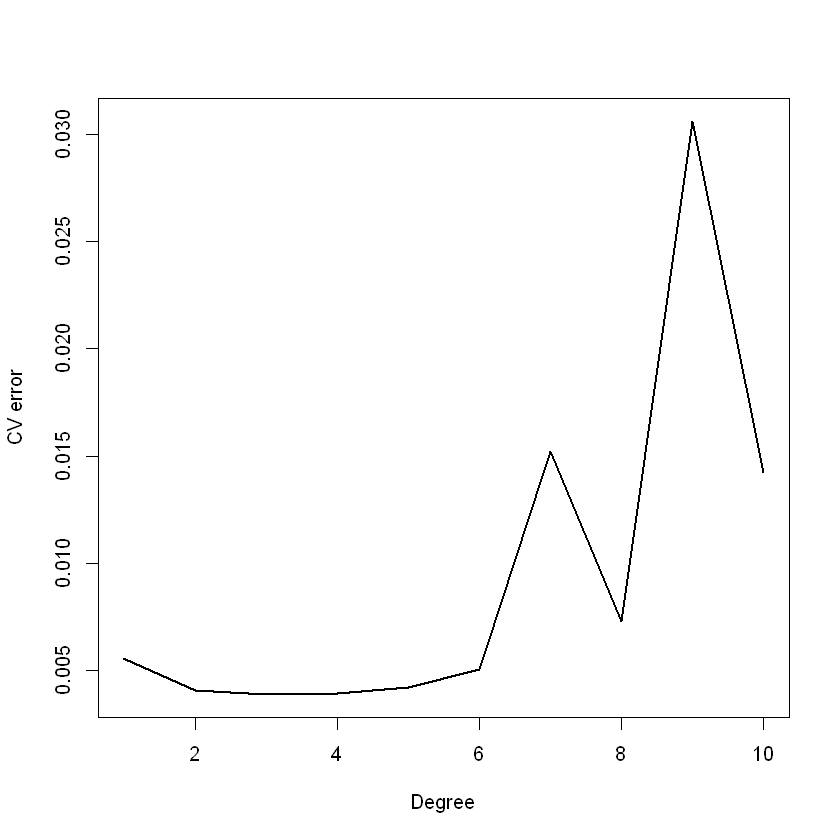

In [25]:

all.deltas = rep(NA, 10)
for (i in 1:10) {
    glm.fit = glm(nox ~ poly(dis, i), data = Boston)
    all.deltas[i] = cv.glm(Boston, glm.fit, K = 10)$delta[2]
}
plot(1:10, all.deltas, xlab = "Degree", ylab = "CV error", type = "l", pch = 20, 
    lwd = 2)

(d) Use the bs() function to fit a regression spline to predict nox
using dis. Report the output for the fit using four degrees of
freedom. How did you choose the knots? Plot the resulting fit.

In [26]:
library(splines)
sp.fit = lm(nox ~ bs(dis, df = 4, knots = c(4, 7, 11)), data = Boston)
summary(sp.fit)


Call:
lm(formula = nox ~ bs(dis, df = 4, knots = c(4, 7, 11)), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124567 -0.040355 -0.008702  0.024740  0.192920 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            0.73926    0.01331  55.537  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))1 -0.08861    0.02504  -3.539  0.00044 ***
bs(dis, df = 4, knots = c(4, 7, 11))2 -0.31341    0.01680 -18.658  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))3 -0.26618    0.03147  -8.459 3.00e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))4 -0.39802    0.04647  -8.565  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))5 -0.25681    0.09001  -2.853  0.00451 ** 
bs(dis, df = 4, knots = c(4, 7, 11))6 -0.32926    0.06327  -5.204 2.85e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06185 on 499 degrees of freedom
Multiple R-squared:  0.7185,	Adju

(e) Now fit a regression spline for a range of degrees of freedom, and
plot the resulting fits and report the resulting RSS. Describe the
results obtained.

(f) Perform cross-validation or another approach in order to select
the best degrees of freedom for a regression spline on this data.
Describe your results.

#### Exercise 10 (p.300, Chap.7) 

This question relates to the College data set.
(a) Split the data into a training set and a test set. Using out-of-state
tuition as the response and the other variables as the predictors,
perform forward stepwise selection on the training set in order
to identify a satisfactory model that uses just a subset of the
predictors.

In [32]:
install.packages("leaps")
library(leaps)
train = sample(length(Outstate), length(Outstate)/2)
test = -train
College.train = College[train, ]
College.test = College[test, ]
reg.fit = regsubsets(Outstate ~ ., data = College.train, nvmax = 17, method = "forward")
reg.summary = summary(reg.fit)

Installing package into 'C:/Users/dwijayaweera/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dwijayaweera\AppData\Local\Temp\RtmpekL8CQ\downloaded_packages


Warning message:
"package 'leaps' was built under R version 3.6.2"

ERROR: Error in sample(length(Outstate), length(Outstate)/2): object 'Outstate' not found


(b) Fit a GAM on the training data, using out-of-state tuition as
the response and the features selected in the previous step as
the predictors. Plot the results, and explain your findings.

In [ ]:
reg.fit = regsubsets(Outstate ~ ., data = College, method = "forward")
coefi = coef(reg.fit, id = 6)
names(coefi)

(c) Evaluate the model obtained on the test set, and explain the
results obtained.

In [33]:
gam.pred = predict(gam.fit, College.test)
gam.err = mean((College.test$Outstate - gam.pred)^2)
gam.err

ERROR: Error in predict(gam.fit, College.test): object 'gam.fit' not found


In [34]:
summary(gam.fit)

ERROR: Error in summary(gam.fit): object 'gam.fit' not found


(d) For which variables, if any, is there evidence of a non-linear
relationship with the response?

Non-linear relationship between response and Expend is displayed according to Anova